In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

# Load Data

In [2]:
path = "Dataset"

# Image Visualization

In [3]:
classes = sorted(os.listdir(path))
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of classes: 26
Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


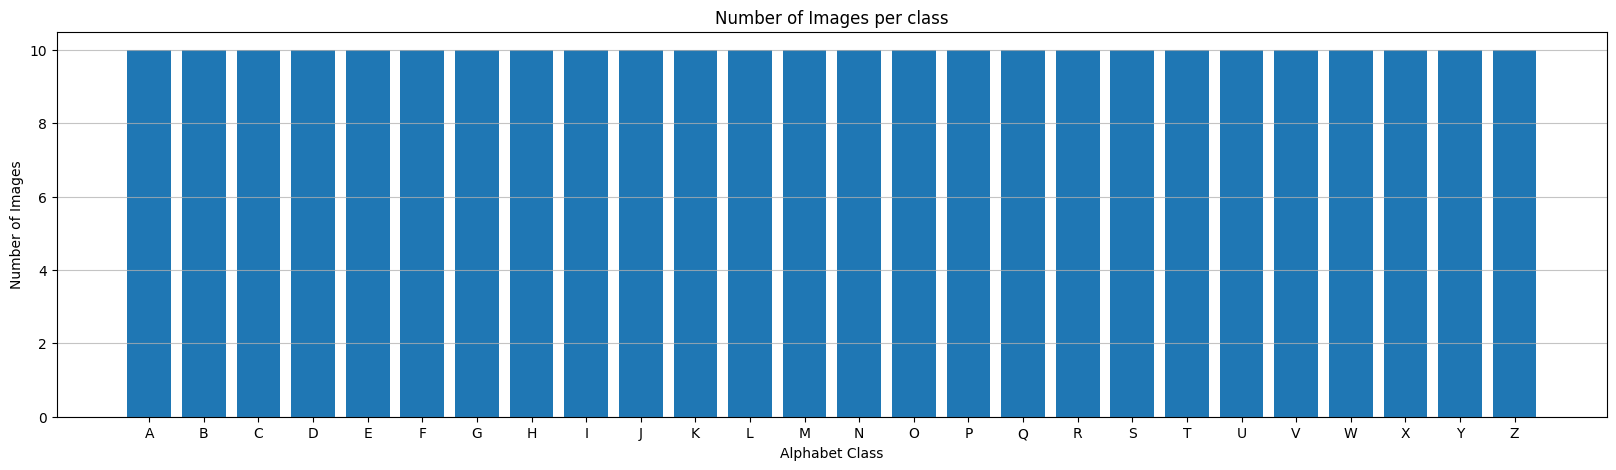

In [4]:
total_images = 0
class_count = []

for cls in classes:
    class_path = os.path.join(path, cls)
    count = len(os.listdir(class_path))
    class_count.append(count)
    total_images += count

plt.figure(figsize=(20, 5))
plt.bar(classes, class_count)
plt.title("Number of Images per class")
plt.xlabel("Alphabet Class")
plt.ylabel("Number of Images")
plt.xticks(classes)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
sample_class = classes[0]
sample_path = os.path.join(path, sample_class)
sample_img = os.path.join(sample_path, os.listdir(sample_path)[0])
img = plt.imread(sample_img)

dimensions = {}
for cls in classes:
    class_path = os.path.join(path, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        dim = img.shape
        dimensions[dim] = dimensions.get(dim, 0) + 1

print("Image dimensions distribution:")
for dim, count in dimensions.items():
    print(f"{dim}: {count} images")

Image dimensions distribution:
(64, 64, 4): 260 images


# Image Pre-processing

In [6]:
from tqdm import tqdm

training_data = []

def create_training_data():
    for category in classes:

        path1 = os.path.join(path,category)
        class_num = classes.index(category)

        for img in tqdm(os.listdir(path1)):
            img_path = os.path.join(path1, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            new_array = cv2.resize(img_array, (28, 28))
            training_data.append([new_array, class_num])

create_training_data()

print(len(training_data))

100%|██████████| 10/10 [00:00<?, ?it/s]

260


In [7]:
import random
random.shuffle(training_data)

In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [9]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
X = np.array(X).reshape(-1, 28, 28, 1)
X = X / 255.0
X[100]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [11]:
from tensorflow.keras.utils import to_categorical # type: ignore
y = to_categorical(y, num_classes=26)
y.shape

(260, 26)

# Training

In [12]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU # type: ignore

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X, y, epochs=10, validation_split=0.2)

model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0621 - loss: 3.2348 - val_accuracy: 0.0962 - val_loss: 3.1822
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2257 - loss: 3.0546 - val_accuracy: 0.1731 - val_loss: 3.0128
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4212 - loss: 2.6948 - val_accuracy: 0.2692 - val_loss: 2.6404
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5975 - loss: 2.0858 - val_accuracy: 0.5962 - val_loss: 1.8146
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8071 - loss: 1.2760 - val_accuracy: 0.6538 - val_loss: 1.2045
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8574 - loss: 0.7460 - val_accuracy: 0.8462 - val_loss: 0.6268
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9350 - loss: 0.3984 - val_accuracy: 0.8654 - val_loss: 0.5258
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9266 - loss: 0.2825 - val_accuracy: 0.7500 - val_loss: 0.6163


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,352 (1.32 MB)

 Trainable params: 115,450 (450.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,902 (901.96 KB)

In [13]:
model.save("Alphabet_Recognition_Model.keras")

# Testing and Evaluation

In [14]:
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(img_array, (28, 28))
    normalized = resized / 255.0
    reshaped = normalized.reshape(-1, 28, 28, 1)
    return reshaped

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


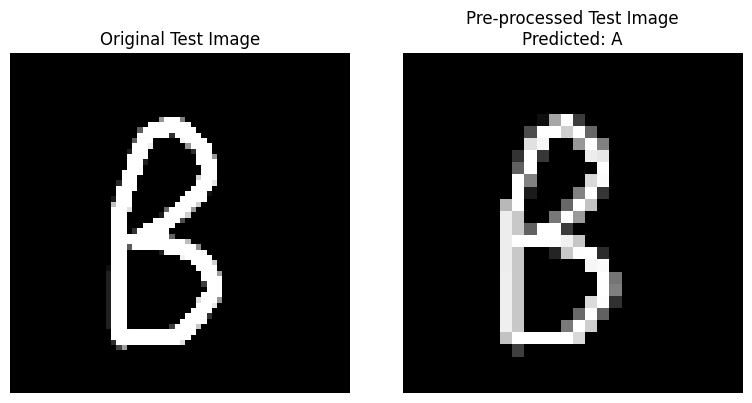

In [15]:
original_img = cv2.imread(r"D:\alphabet recognition\Test Dataset\B\0_001.png", cv2.IMREAD_COLOR_RGB)
image = prepare_image(r"D:\alphabet recognition\Test Dataset\B\0_001.png")
model = tf.keras.models.load_model(r'D:\alphabet recognition\Alphabet_Recognition_Model.keras')

prediction = model.predict(image)
predicted_index = np.argmax(prediction)
predicted_label = classes[predicted_index]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original Test Image")
axes[0].axis('off')

axes[1].imshow(image[0].reshape(28, 28), cmap='gray')
axes[1].set_title(f"Pre-processed Test Image\nPredicted: {predicted_label}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         2
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       0.00      0.00      0.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       0.50      1.00      0.67         1
           I       0.00      0.00      0.00         1
           J       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           N       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1
           Q       1

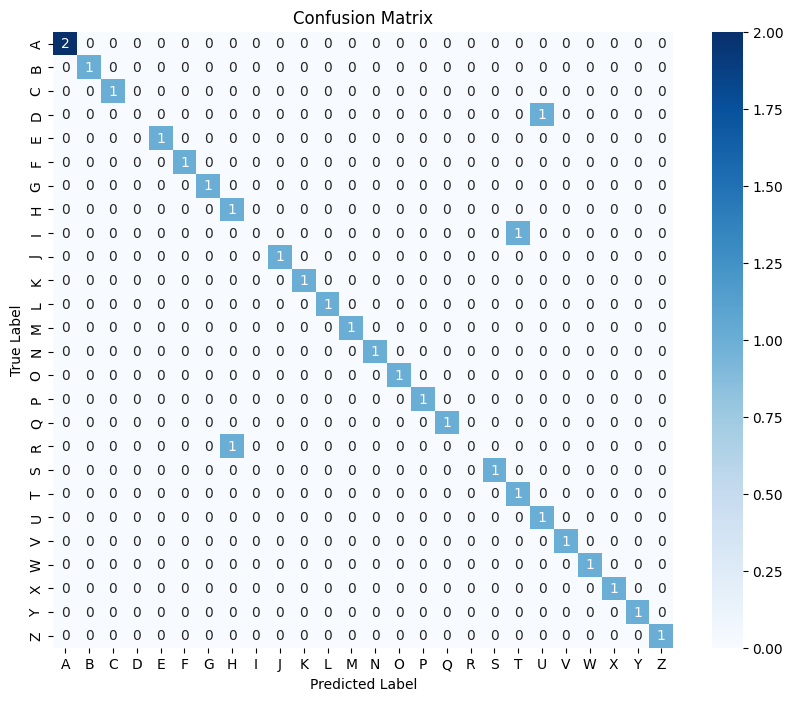


Total incorrect predictions: 3


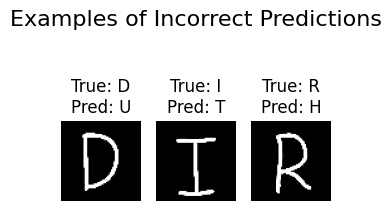

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# === Step 1: Load test images and labels ===
test_dir = r'D:\alphabet recognition\Test Dataset'
X_test, y_test, image_paths = [], [], []
class_names = sorted(os.listdir(test_dir))

for label in class_names:
    class_path = os.path.join(test_dir, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = prepare_image(img_path)
        X_test.append(img)
        y_test.append((label))
        image_paths.append(img_path)

X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test)

# === Step 2: Make predictions ===
y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_pred = [classes[idx] for idx in y_pred_indices]

# === Step 3: Classification metrics ===
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# === Step 4: Confusion Matrix ===
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# === Step 5: Show incorrect predictions ===
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"\nTotal incorrect predictions: {len(incorrect_indices)}")

# Show a few incorrect samples
num_to_display = min(10, len(incorrect_indices))
plt.figure(figsize=(3, 3))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    img = cv2.imread(image_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, num_to_display, i+1)
    plt.imshow(img)
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Examples of Incorrect Predictions', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()